In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
before_trip = pd.read_excel("data/코로나이전_국내힐링여행.xlsx")

In [3]:
before_trip.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/yeongju_city?Redirect=L...,2018.03.22.,국내 힐링 여행 봄에 떠나는 소수서원 여행,"['#국내힐링여행', '#소수서원', '#힐링여행', '#영주시', '#걷기좋은길'...",['3월\xa0그것도\xa024절기\xa0중\xa0낮과\xa0밤이\xa0같아져서\x...
1,https://blog.naver.com/incheontogi?Redirect=Lo...,2018.05.25.,국내 힐링 여행 아름다운 풍경의 국화저수지,"['#강화도가볼만한곳', '#강화도여행', '#국화저수지', '#강화도낚시터', '...","[' ', ' 물의\xa0도시\xa0강화에는\xa0여러\xa0저수지가\xa0조성되어..."
2,https://blog.naver.com/hp0210?Redirect=Log&log...,2017.05.02.,"국내힐링여행, 대전 계족산 황톳길 맨발축제로 떠나볼까요?","['#국내힐링여행', '#계족산황톳길', '#계족산맨발축제', '#맥키스컴퍼니', ...",['따사로운 봄을 건너뛰고 계절이 어느덧 여름으로 훌쩍 넘어간 느낌입니다. 집에만 ...
3,https://blog.naver.com/boryeongsi?Redirect=Log...,2017.08.22.,"[국내힐링여행] 가고싶은 섬, 호도섬","['#국내힐링여행', '#호도섬', '#호도', '#가고싶은섬', '#서해섬', '...","['[국내힐링여행]\xa0가고싶은\xa0섬, 호도섬보령에는 크고 작은 아름답고 아늑..."
4,https://blog.naver.com/bau83?Redirect=Log&logN...,2018.04.21.,국내 힐링 여행을 떠나볼까요? 미시령 힐링가도 9경,"['#국내힐링여행', '#국내자동차여행', '#미시령힐링가도', '#자동차올레길',...",['힐링과 낭만을 컨셉으로 한 우리나라 최초의 자동차 올레길 <미시령 힐링가도>를 ...


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
before_trip["hashtags"] = before_trip["hashtags"].apply(ast.literal_eval)
before_trip["contents"] = before_trip["contents"].apply(ast.literal_eval)

In [5]:
before_trip = before_trip[(before_trip["hashtags"].str.len() != 0) | (before_trip["contents"].str.len() != 0)]

In [6]:
len(before_trip)

1924

- hashtags랑 contents 데이터 합치기

In [7]:
before_trip["info"] = before_trip["hashtags"] + before_trip["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사로 쪼개기

In [8]:
before_trip["info"] = before_trip["info"].map(lambda x: ' '.join(x))

In [9]:
before_trip["info"] = before_trip["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [10]:
okt = Okt()
before_trip["info"] = before_trip["info"].map(lambda x: okt.nouns(x))

In [11]:
before_trip["info"]

0       [국내힐링여행, 소수서원, 힐링여행, 영주시, 걷기, 길, 산책로, 취한, 강학단,...
1       [강화도, 곳, 강화도, 여행, 국화, 저수지, 강화도, 낚시터, 힐링여행, 가족,...
2       [국내힐링여행, 계족산, 황톳길, 계족산, 맨발, 축제, 맥, 키스, 컴퍼니, 숲속...
3       [국내힐링여행, 호도, 섬, 호도, 섬, 서해, 섬, 섬, 서해안, 섬, 여행, 휴...
4       [국내힐링여행, 국내, 자동차, 여행, 미시령, 힐링, 가도, 자동차, 올레길, 힐...
                              ...                        
1995    [채널, 관찰, 카메라, 남이섬, 남이섬, 탐방, 기, 힐링여행, 관찰, 카메라, ...
1996    [국내, 여행, 설연휴, 설, 여행, 국내여행지, 겨울, 여행지, 설, 여행지, 설...
1997    [국내, 온천, 여행, 온천, 곳, 솔기, 온천, 수안보온천, 국내, 천지, 군내,...
1998    [국내, 여행, 전라도, 정읍, 내장산, 국립공원, 장사, 추천, 힐링, 치유, 단...
1999    [덕, 호텔, 박, 지하, 덕, 온천, 스파월드, 덕, 구보, 온천, 순도, 순수,...
Name: info, Length: 1924, dtype: object

# WordCloud

In [12]:
word_tokens = list(before_trip["info"])
word_tokens = sum(word_tokens, [])

In [13]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [14]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

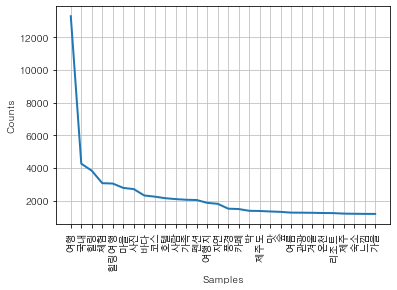

In [15]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

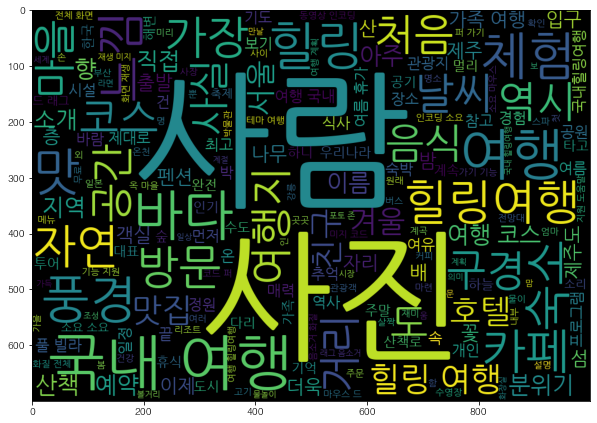

In [16]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('국내힐링여행_코로나전.png')

# LDA

In [24]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric

In [25]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = before_trip["info"].apply(lambda x: korean_stop_words(x, stop_words))

dictionary = corpora.Dictionary(dataset)
corpus = [dictionary.doc2bow(data) for data in dataset]

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [27]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 1;
    step = 5;
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

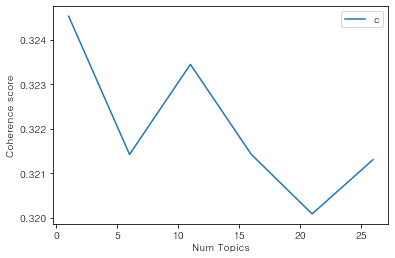

In [28]:
find_optimal_number_of_topics(dictionary, corpus, dataset)

In [29]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=11, passes=30)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.024*"여행" + 0.009*"국내" + 0.006*"순천" + 0.006*"힐링" + 0.006*"글램핑"')
(1, '0.024*"여행" + 0.018*"펜션" + 0.010*"사진" + 0.008*"바다" + 0.006*"카페"')
(2, '0.017*"여행" + 0.013*"섬" + 0.011*"코스" + 0.008*"바다" + 0.006*"자연"')
(3, '0.011*"곡성" + 0.007*"제주" + 0.005*"국내힐링여행" + 0.005*"장" + 0.005*"사진"')
(4, '0.032*"여행" + 0.023*"호텔" + 0.011*"여수" + 0.010*"국내" + 0.007*"바다"')
(5, '0.021*"여행" + 0.021*"마을" + 0.010*"담양" + 0.008*"힐링" + 0.006*"국내"')
(6, '0.017*"여행" + 0.016*"소요" + 0.016*"속초" + 0.011*"도움말" + 0.010*"코드"')
(7, '0.020*"여행" + 0.010*"마을" + 0.008*"강릉" + 0.006*"사진" + 0.006*"힐링"')
(8, '0.022*"여행" + 0.015*"온천" + 0.013*"국내" + 0.010*"힐링" + 0.008*"스파"')
(9, '0.056*"여행" + 0.014*"트레킹" + 0.009*"관광" + 0.009*"힐링여행" + 0.008*"국내"')
(10, '0.024*"체험" + 0.014*"여행" + 0.011*"힐링" + 0.008*"자연" + 0.008*"마을"')


In [30]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (c_v): ', coherence_lda)

Coherence Score (c_v):  0.41459975325968607


In [31]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)


Coherence Score (u_mass):  -1.938843540896582


In [32]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
                
    return(topic_table)

In [33]:
topictable = make_topictable_per_doc(lda_model, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.7226,"[(0, 0.125754), (5, 0.72257066), (6, 0.1487323)]"
1,1,8.0,0.7611,"[(8, 0.7610828), (10, 0.23265888)]"
2,2,8.0,0.9247,"[(7, 0.0723437), (8, 0.92473)]"
3,3,2.0,0.8102,"[(1, 0.10404087), (2, 0.81017363), (8, 0.08214..."
4,4,5.0,0.3435,"[(2, 0.3239645), (5, 0.34346068), (7, 0.125601..."
...,...,...,...,...
1919,1919,2.0,0.9726,"[(1, 0.025328634), (2, 0.97260886)]"
1920,1920,8.0,0.4521,"[(4, 0.3170327), (6, 0.069651924), (7, 0.11165..."
1921,1921,8.0,0.9593,"[(6, 0.035979867), (8, 0.95928335)]"
1922,1922,8.0,0.7728,"[(2, 0.22442706), (8, 0.7728128)]"


In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_viz)